# ECXAS: A data aggregation tool for battery study in ROCK beamline

As part of the European project BIG-MAP (Battery Interface Genome Materials Accelerated Platform, www.big-map.eu) a need for semi-automated data processing was identified during the acquisition of data from beamlines, coupled with electrochemical equipment for example. In the current state, these data arrive out of sync (for example time series of absorption spectroscopy and electrochemical potential during a charge-discharge cycle of a battery), which makes their representation complex. There therefore appears the need for a tool for aggregating asynchronous data and generating maps with a homogeneous appearance.

## The ROCK case - an example

Here we present an example of an operando XAS experiment done on an electrochemistry cell developed by Dr. Gilles Moehl. The characteristics of the cell were as follows:

* Diamond peek-mak: LNO BASF/Celgard/Lithium, 28uL LP57, 4.5 bar pressure
* C=225 mAh
* 3-4.3 V vs lithium

Cycling protocol:
* 2 cycles at C/10 + 2 cycles at C/4
* 2 EC Lab files to merge.
* Total duration ≈ 50h

XAS acquisition protocol:
* Measured the evolution of the Ni K-edge
* 2 spectra taken at two different positions of the cell (duration ≈ 2 min) every 15 mins approximately
* Total spectra = 458

### Import the necessary libraries

In [1]:
import numpy as np, pandas as pd, os
import matplotlib.pyplot as plt
# developed package for EC - XAS data aggregation
from perex import ecxas
# some additional visualization options
%matplotlib inline
pd.set_option('display.max_columns', None)

## 1. Importing the electrochemistry data

### Define the paths from the source files

In [2]:
# path(s) of the EC Lab file(s)
#ec_path1 = 'operando/EC/220726cell4operandoxas_C06.mpt'
ec_path1 = '/home/experiences/rock/com-rock/ruche/rock-soleil/com-rock/2022/Projets/20220725_Gilles/output/220726cell4operandoxas_C06.mpt'
#ec_path2 = 'operando/EC/220726cell4operandoxascontinuation_C06.mpt'
ec_path2 = '/home/experiences/rock/com-rock/ruche/rock-soleil/com-rock/2022/Projets/20220725_Gilles/output/220726cell4operandoxascontinuation_C06.mpt'

In [3]:
# get EC dataframe
# note that we can join several EC lab files, you just need to specify the path for all
# the 'with_settings' parameter set to 1 gives an additional dataframe with the chosen settings of the EC experiment
EC_df, EC_settings_df = ecxas.getECdf(ec_path1,ec_path2,with_settings=1)

EC dataframe ready.


In [4]:
# let's take a look at the first rows of our EC dataframe
EC_df.head()

,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,time/s,dq/mA.h,(Q-Qo)/mA.h,control/V/mA,Ewe/V,I Range,Q charge/discharge/mA.h,half cycle,P/W,<I>/mA,cycle number,Energy charge/W.h,Energy discharge/W.h,Capacitance charge/µF,Capacitance discharge/µF,x,Q discharge/mA.h,Q charge/mA.h,Capacity/mA.h,Efficiency/%,control/V,control/mA,datetime
0,3,1,0,0,0,0,0,0.0,0.0,0.0,0.0,3.491201,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:30.190000000
1,3,1,0,0,0,0,0,1.0,0.0,0.0,0.0,3.491278,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:31.189999975
2,3,1,0,0,0,0,0,2.0,0.0,0.0,0.0,3.491182,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:32.189999949
3,3,1,0,0,0,0,0,3.0,0.0,0.0,0.0,3.491201,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:33.189999924
4,3,1,0,0,0,0,0,4.0,0.0,0.0,0.0,3.491239,14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-26 22:38:34.189999899


Number of rows and columns:

In [5]:
EC_df.shape

(7735, 30)

In [6]:
# and the settings for each sequence
EC_settings_df.transpose()

,0,1,2,3,4,5,6
Ns,0,1,2,3,4,5,6
Set I/C,I,I,I,I,I,I,I
Is,0,154,-154,385,0,385,-385
unit Is,mA,µA,µA,µA,mA,µA,µA
vs.,<None>,<None>,<None>,<None>,<None>,<None>,<None>
N,1,1,1,1,1,1,1
I sign,> 0,> 0,> 0,> 0,> 0,> 0,> 0
t1 (h:m:s),0:00:0.0000,1000:00:0.0000,1000:00:0.0000,1000:00:0.0000,0:00:0.0000,1000:00:0.0000,1000:00:0.0000
I Range,100 µA,100 µA,100 µA,1 mA,1 mA,1 mA,1 mA
Bandwidth,5,5,5,5,5,5,5


## 2. Basic visualization of the electrochemistry data

### Basic U/I vs. time curve

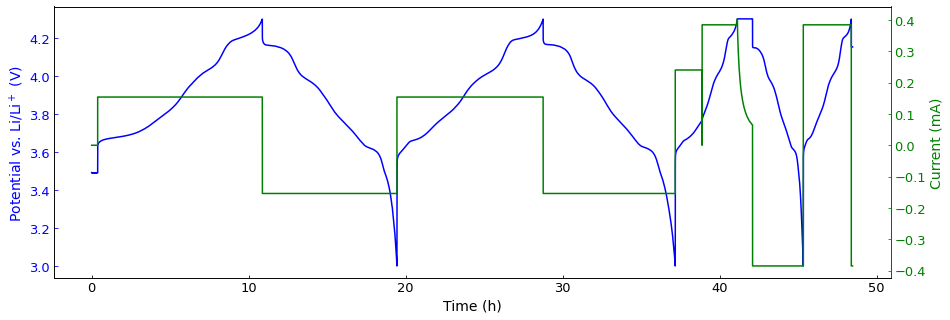

In [7]:
# FUNCTION: ecxas.plotUI_vs_time(electrodf,width=15,height=5)
# ARGUMENTS: electrodf = EC dataframe
#            width = width of the plot (default 15)
#            height = height of the plot (default 5)
#
# Note that the only mandatory argument is the name of the EC dataframe.

ecxas.plotUI_vs_time(EC_df);

### Capacity vs. potential curve

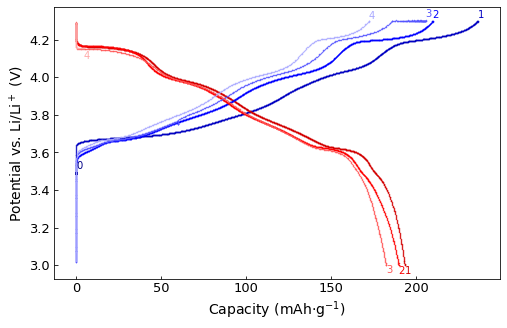

In [8]:
# FUNCTION: plotCapacity_vs_U(electrodf,nb_cycle=None,width=8,height=5,mass=1000)
# ARGUMENTS: electrodf = EC dataframe
#            nb_cycle = the number of cycle that you want to plot. It can be an integer (e.g. 5, for cycle 5)
#                       or a list (e.g. [1,2,5] if you want to plot cycles 1,2, and 5).
#                       If not specified, it plots ALL cycles.
#            width = width of the plot (default 8)
#            height = height of the plot (default 5)
#            mass = mass of active material in mg
#
#
# Note that the only mandatory argument is the EC Lab file path.

ecxas.plotCapacity_vs_U(EC_df,mass=4.44*1.54);

### dQdV vs. potential curve

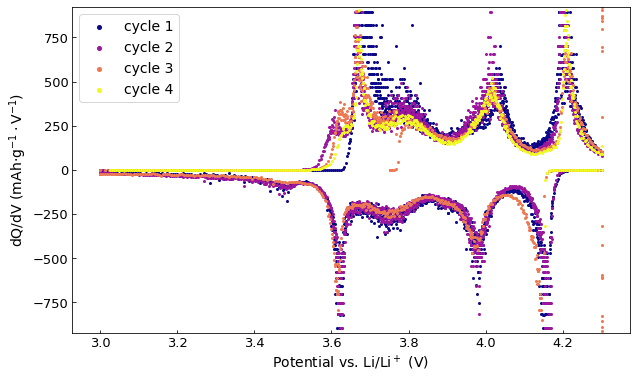

In [9]:
# FUNCTION : ecxas.plotdQdU_vs_U(electrodf,nb_cycle=None,reduce_by=1,boxcar=1,savgol=(1,0),
#                                colormap='plasma',width=10,height=6,dotsize=10,alpha=1, mass=1000)
# ARGUMENTS: electrodf = EC dataframe
#            nb_cycle = the number of cycle that you want to plot. It can be an integer (e.g. 5, for cycle 5)
#                       or a list (e.g. [1,2,5] if you want to plot cycles 1,2, and 5).
#                       If not specified, it plots ALL cycles.
#            reduce_by = 'Smooth' by reducing the number of points.
#                         e.g. reduce_by=10 (reduces the nb of points by 10)
#            boxcar = Apply a boxcar filter (moving average). You have to specify the size of the moving window.
#                     e.g. boxcar=10 averages over 10 points.
#            savgol = Apply a Savitzky-Golay filter. You must specify (window_length, polyorder).
#                     e.g. savgol=(5,2)
#            colormap = The colormap used for the plot.
#                       Several options here https://matplotlib.org/stable/tutorials/colors/colormaps.html.
#                       The default option is the 'plasma' colormap.
#            width = width of the plot (default 10)
#            height = height of the plot (default 6)
#            dotsize = size of the scattered dots (default 10)
#            alpha = transparency of the dots (default 1=no transparency)
#            mass = mass of active material
#
#
# Note that the only mandatory argument is the EC dataframe name

ecxas.plotdQdU_vs_U(EC_df[EC_df['cycle number'].isin([1,2,3,4])],dotsize=4,mass=4.44*1.54);

## 3. Importing the XAS data

In [10]:
# subfolder containing the XAS files
#XAS_folder = 'operando/XAS_normalized'
XAS_folder = '/home/experiences/rock/com-rock/ruche/rock-soleil/com-rock/2022/Projets/20220725_Gilles/output/all/normalized_Gilles'

In [11]:
# get XAS files dataframe
# you can filter the choice of files by using a list of keywords (in this case, only the filenames containing 'cell4' and 'pos2')
XAS_df = ecxas.getXASfilesdf(XAS_folder,filters=['pos2','cell4'])

XAS dataframe ready.


In [12]:
# let's take a look
XAS_df.head(3)

,filename,datetime,elapsed time/s,sample T (C),E0,E_shift,E0_pivot,I jump at E0_pivot,shifted energy,normalized,reference,ref.derivative,I0,average time XAS
0,norm_op2_cell4_pos2_dq1_0001_av240_00001.txt,2022-07-26 23:04:36.969,64.810888,NaN,8332.88,-0.200001,8349.6,0.724352,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.002439815, 0.001902658, 0.001924003, 0.0027...","[1.037278, 1.034635, 1.032342, 1.030151, 1.028...","[-0.0005300965, -0.0004941115, -0.0004601611, ...","[14940.73, 14960.38, 14984.8, 15008.35, 15030....",2022-07-26 23:05:41.779887568
1,norm_op2_cell4_pos2_dq1_0002_av240_00001.txt,2022-07-26 23:16:03.924,64.933192,NaN,8332.88,-0.200000,8349.6,0.724257,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.002464999, 0.001625301, 0.002022142, 0.0027...","[1.03706, 1.034739, 1.032544, 1.030092, 1.0279...","[-0.0004647471, -0.0004512132, -0.0004549936, ...","[14939.72, 14959.6, 14984.23, 15007.17, 15029....",2022-07-26 23:17:08.857191789
2,norm_op2_cell4_pos2_dq1_0003_av240_00001.txt,2022-07-26 23:27:30.912,64.659438,NaN,8332.88,-0.196742,8349.6,0.724316,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.002523064, 0.001695463, 0.001989924, 0.0026...","[1.037393, 1.0348, 1.032439, 1.03026, 1.028131...","[-0.0005195261, -0.0004957647, -0.000463083, -...","[14940.09, 14958.99, 14983.96, 15006.97, 15029...",2022-07-26 23:28:35.571438029


## 4. Merging both dataframes (EC + XAS data) based on time

In [13]:
# merge both dataframes based on time
output_df=ecxas.mergeEC_XASdfs(EC_df,XAS_df)

Merged dataframe ready.


In [14]:
# new dataframe containing both spectroscopic and chosen electrochemical data
output_df.head(3)

,filename,starttime XAS,elapsed time XAS/s,sample T (C),E0,E_shift,E0_pivot,I jump at E0_pivot,shifted energy,normalized,reference,ref.derivative,I0,average time XAS,datetime EC,Ewe/V,<I>/mA,x,Capacity/mA.h,half cycle,cycle number,absolute time/s,absolute time/min,absolute time/h
0,norm_op2_cell4_pos2_dq1_0001_av240_00001.txt,2022-07-26 23:04:36.969,64.810888,NaN,8332.88,-0.200001,8349.6,0.724352,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.002439815, 0.001902658, 0.001924003, 0.0027...","[1.037278, 1.034635, 1.032342, 1.030151, 1.028...","[-0.0005300965, -0.0004941115, -0.0004601611, ...","[14940.73, 14960.38, 14984.8, 15008.35, 15030....",2022-07-26 23:05:41.779,2022-07-26 23:05:47.325,3.648829,0.153949,0.899994,0.011129,2,1.0,64.810888,1.080181,0.018003
1,norm_op2_cell4_pos2_dq1_0002_av240_00001.txt,2022-07-26 23:16:03.924,64.933192,NaN,8332.88,-0.200000,8349.6,0.724257,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.002464999, 0.001625301, 0.002022142, 0.0027...","[1.03706, 1.034739, 1.032544, 1.030092, 1.0279...","[-0.0004647471, -0.0004512132, -0.0004549936, ...","[14939.72, 14959.6, 14984.23, 15007.17, 15029....",2022-07-26 23:17:08.857,2022-07-26 23:17:17.325,3.660543,0.153949,0.899979,0.040635,2,1.0,754.933174,12.582220,0.209704
2,norm_op2_cell4_pos2_dq1_0003_av240_00001.txt,2022-07-26 23:27:30.912,64.659438,NaN,8332.88,-0.196742,8349.6,0.724316,"[8060.0, 8065.0, 8070.0, 8075.0, 8080.0, 8085....","[0.002523064, 0.001695463, 0.001989924, 0.0026...","[1.037393, 1.0348, 1.032439, 1.03026, 1.028131...","[-0.0005195261, -0.0004957647, -0.000463083, -...","[14940.09, 14958.99, 14983.96, 15006.97, 15029...",2022-07-26 23:28:35.571,2022-07-26 23:28:47.325,3.666314,0.153949,0.899963,0.070142,2,1.0,1444.659403,24.077657,0.401294


In [15]:
# save the dataframe to a txt file
# you can choose the columns you want to save
cols = ['filename','average time XAS','datetime EC','Ewe/V','absolute time/s']
# choose an output pathname
output_name = 'test.dat'
# save
output_df[cols].to_csv(output_name, index=False, sep='\t')
print('Output file succesfully created!')

Output file succesfully created!


## 5. Additional visualization

### Evolution of the Ni K-edge position

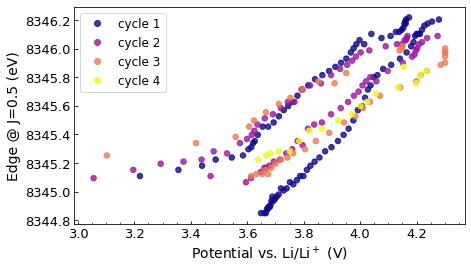

In [16]:
# we can plot the evolution of the Ni K-edge position vs potential
# note that we choose the edge at a normalized intensity of 0.5
ecxas.plotEshift_vs_U(output_df,edge_intensity=0.5,width=7,height=4,dotsize=30,alpha=0.8);

In [17]:
# if you want to know what additional parameters are in the 'plotEshift_vs_U' function
help(ecxas.plotEshift_vs_U)

Help on function plotEshift_vs_U in module perex.ecxas:

plotEshift_vs_U(merged_df, nb_cycle=None, edge_intensity='inflection', colormap='plasma', width=10, height=6, dotsize=10, alpha=0.5)
    Function to plot edge shift vs potential graph.
    
    :merged_df: Pandas dataframe with the data from the EC Lab file merged with the XAS files data.
    :nb_cycle: List of the cycles you want to plot. Or integer with the cycle you want to plot.
    :edge_intensity: Intensity value to get the edge energy value.
    :colormap: Name of the colormap you want to use for the plot.
    :width: Width of the graph.
    :height: Height of the graph.
    :dotsize: Size of the dot of the scatter plot.
    :alpha: Transparency of the points.
    :return: Plot.



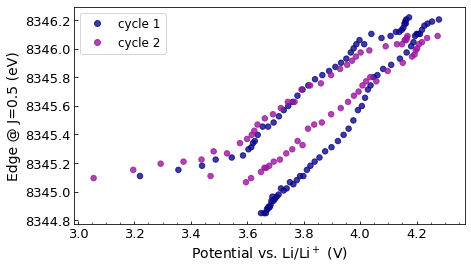

In [18]:
# let's plot the first 2 cycles (C/10)
ecxas.plotEshift_vs_U(output_df,edge_intensity=0.5,nb_cycle=[1,2],width=7,height=4,dotsize=30,alpha=0.8);

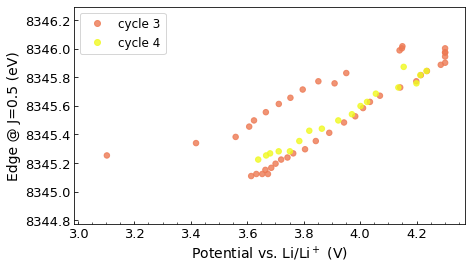

In [19]:
# now the last 2 cycles (C/4)
ecxas.plotEshift_vs_U(output_df,edge_intensity=0.5,nb_cycle=[3,4],width=7,height=4,dotsize=30,alpha=0.8);

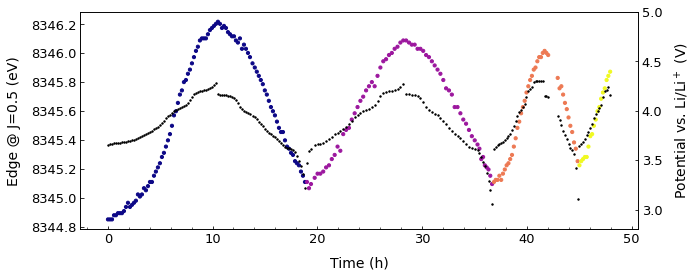

In [20]:
# now the evolution of the edge position over time
ecxas.plotEshift_vs_t(output_df,edge_intensity=0.5,width=10,height=4,dotsize=10,alpha=0.8);

### Evolution of the XANES spectra shape

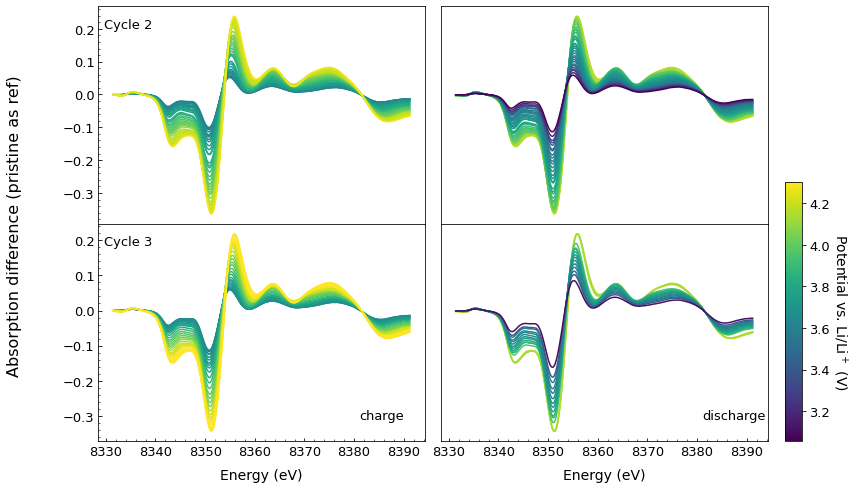

In [21]:
# Function to plot the absorption difference (taking pristine as reference) vs energy.
# note that you can choose the specific cycles you want to plot
ecxas.plotAbsorptionDiff(output_df, width=12, height=4, nb_cycle=[2,3]);

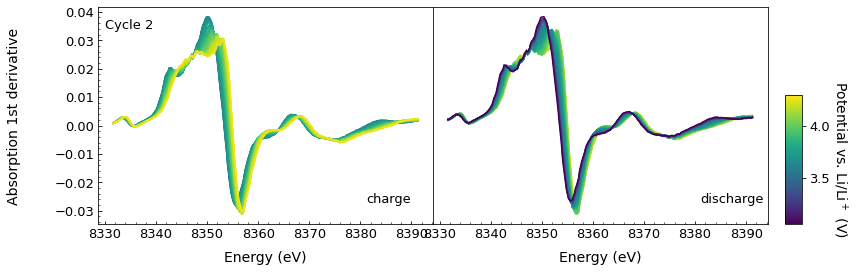

In [22]:
# Function to plot the absorption derivative vs energy
ecxas.plotAbsorptionDerivative(output_df, width=12, height=4, nb_cycle=2, deriv=1);

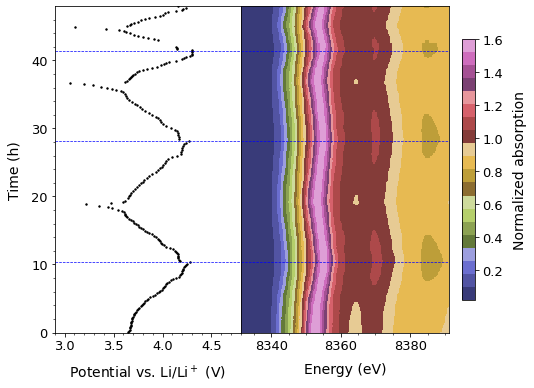

In [23]:
# another type of visualization, 2D intensity plot over time
ecxas.plot2d_XANES_vs_t(output_df);

<IPython.core.display.Javascript object>


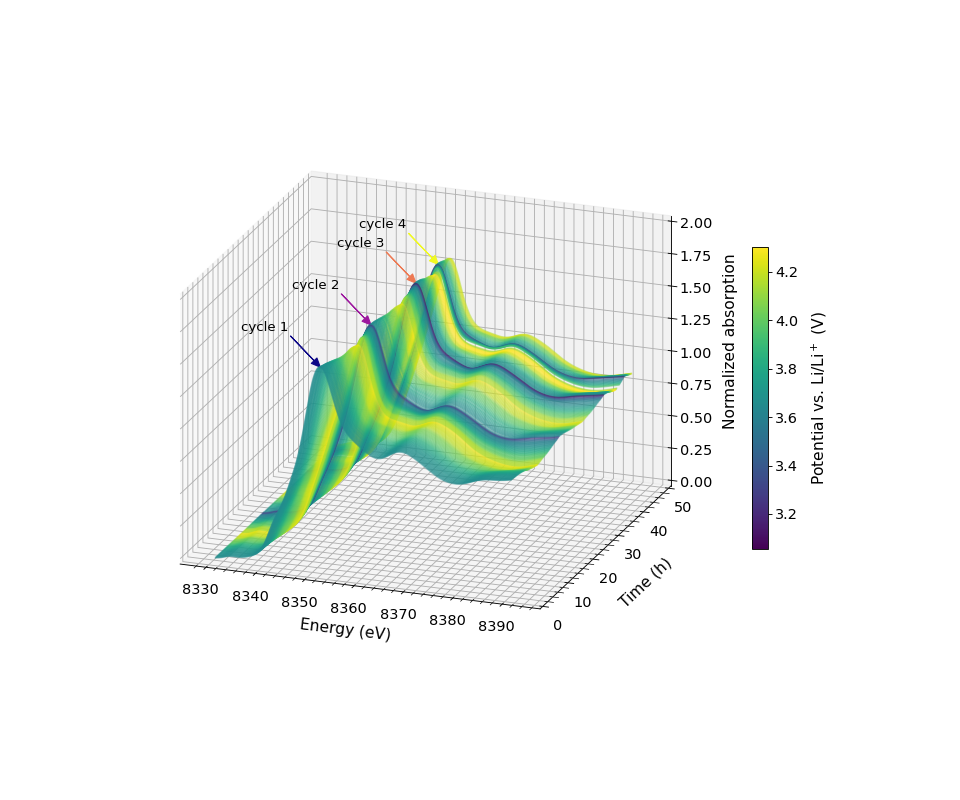

In [24]:
%matplotlib notebook
# another type of visualization, 3D plot of all the spectra over time
ecxas.plot3d_XANES_vs_t(output_df,width=12,height=10);